# Task 6.3. Geographical Visualizations

### This script contains the following:
#### 1. Import data and libraries
#### 2. Creating and importing JSON file
#### 3. Data wrangling 
#### 4. Data cleaning
#### 5. Choropleth map
#### 6. Conclussions

### 1. Importing libraries and data

In [1]:
# To import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# Then we create a path 

path = r'C:\Users\javis\OneDrive\Documentos\Career Foundry\2. Data Immersion\6. Advanced Analytics\UK HPI Project'

In [3]:
# We import our data, which had already been cleaned

df = pd.read_csv(os.path.join(path,'2. Data', '2.2. Prepared Data', 'HPI wrangled.csv'), index_col = False)

In [4]:
# To have a look at how it looks like

df.head()

,Unnamed: 0,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,%Change_AvgPrice_1month,%Change_AvgPrice_12months,AveragePriceSA,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,0,01/01/2004,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,NaN,NaN,...,88436.13953,40.267250,NaN,NaN,103.0,81043.95084,40.883367,NaN,NaN,285.0
1,1,01/02/2004,Aberdeenshire,S12000034,81678.76231,40.856757,NaN,-0.018248,NaN,NaN,...,88606.44649,40.344795,0.192576,NaN,107.0,80965.29542,40.843688,-0.097053,NaN,219.0
2,2,01/03/2004,Aberdeenshire,S12000034,83525.09702,41.780317,NaN,2.260483,NaN,NaN,...,90296.91375,41.114508,1.907838,NaN,140.0,82903.23948,41.821302,2.393549,NaN,313.0
3,3,01/04/2004,Aberdeenshire,S12000034,84333.67900,42.184780,NaN,0.968071,NaN,NaN,...,90319.87844,41.124964,0.025432,NaN,180.0,84003.99161,42.376586,1.327755,NaN,391.0
4,4,01/05/2004,Aberdeenshire,S12000034,86379.95396,43.208353,NaN,2.426403,NaN,NaN,...,91989.17763,41.885039,1.848208,NaN,167.0,86222.73484,43.495852,2.641235,NaN,335.0


In [5]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

### 2. Importing JSON file

In [6]:
uk_geo = r'C:\Users\javis\OneDrive\Documentos\Career Foundry\2. Data Immersion\6. Advanced Analytics\UK HPI Project\2. Data\2.1. Original Data\topo_lad.json'

In [44]:
# To have a look at the JSON file contents

f = open(r'C:\Users\javis\OneDrive\Documentos\Career Foundry\2. Data Immersion\6. Advanced Analytics\UK HPI Project\2. Data\2.1. Original Data\topo_lad.json',)
  
# returns JSON object asa dictionary
data = json.load(f)

# Iterating through the json list
for i in data['name']:
    print(i)

KeyError: 'name'

### 3. Data wrangling

In [10]:
df.shape

(134829, 55)

In [11]:
# Check for missing values

df.isnull().sum()

Unnamed: 0                        0
Date                              0
RegionName                        0
AreaCode                          0
AveragePrice                      0
Index                             0
IndexSA                      130305
%Change_AvgPrice_1month         443
%Change_AvgPrice_12months      5040
AveragePriceSA               130305
SalesVolume                    4499
DetachedPrice                  6237
DetachedIndex                  6237
Detached1m%Change              6646
Detached12m%Change            11121
SemiDetachedPrice              6225
SemiDetachedIndex              6225
SemiDetached1m%Change          6634
SemiDetached12m%Change        11109
TerracedPrice                  6198
TerracedIndex                  6198
Terraced1m%Change              6607
Terraced12m%Change            11082
FlatPrice                      5901
FlatIndex                      5901
Flat1m%Change                  6311
Flat12m%Change                10797
CashPrice                   

In [14]:
# I will create a subset for those variables that I will use for our analysis. But I will define the columns first

columns = ["RegionName","AreaCode", "AveragePrice", "Index","%Change_AvgPrice_1month","%Change_AvgPrice_12months", "NewPrice","NewSalesVolume", "OldPrice", "OldSalesVolume"]

In [15]:
# To create the subset

uk_hpi = df[columns]

In [16]:
# Let's have a look..

uk_hpi.head()

,RegionName,AreaCode,AveragePrice,Index,%Change_AvgPrice_1month,%Change_AvgPrice_12months,NewPrice,NewSalesVolume,OldPrice,OldSalesVolume
0,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,88436.13953,103.0,81043.95084,285.0
1,Aberdeenshire,S12000034,81678.76231,40.856757,-0.018248,NaN,88606.44649,107.0,80965.29542,219.0
2,Aberdeenshire,S12000034,83525.09702,41.780317,2.260483,NaN,90296.91375,140.0,82903.23948,313.0
3,Aberdeenshire,S12000034,84333.67900,42.184780,0.968071,NaN,90319.87844,180.0,84003.99161,391.0
4,Aberdeenshire,S12000034,86379.95396,43.208353,2.426403,NaN,91989.17763,167.0,86222.73484,335.0


In [18]:
# For those variables that we will use, I will impute missing values with median

uk_hpi['%Change_AvgPrice_1month'].fillna(uk_hpi['%Change_AvgPrice_1month'].median(), inplace=True)
uk_hpi['%Change_AvgPrice_12months'].fillna(uk_hpi['%Change_AvgPrice_12months'].median(), inplace=True)
uk_hpi['NewPrice'].fillna(uk_hpi['NewPrice'].median(), inplace=True)
uk_hpi['NewSalesVolume'].fillna(uk_hpi['NewSalesVolume'].median(), inplace=True)
uk_hpi['OldPrice'].fillna(uk_hpi['OldPrice'].median(), inplace=True)
uk_hpi['OldSalesVolume'].fillna(uk_hpi['OldSalesVolume'].median(), inplace=True)

In [19]:
# Last check for NaN

uk_hpi.isnull().sum()

RegionName                   0
AreaCode                     0
AveragePrice                 0
Index                        0
%Change_AvgPrice_1month      0
%Change_AvgPrice_12months    0
NewPrice                     0
NewSalesVolume               0
OldPrice                     0
OldSalesVolume               0
dtype: int64

### 4. Data cleaning

In [20]:
# To look out for duplicates

dups = uk_hpi.duplicated()

In [21]:
dups.shape 

(134829,)

There is no duplicates in our subset

<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

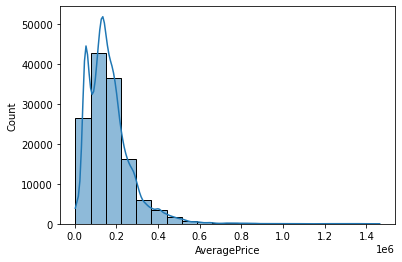

In [22]:
# To check if we have extreme values

sns.histplot(uk_hpi ['AveragePrice'], bins=20, kde = True) # shows extreme values for 'AveragePrice'

<AxesSubplot:xlabel='OldPrice', ylabel='Count'>

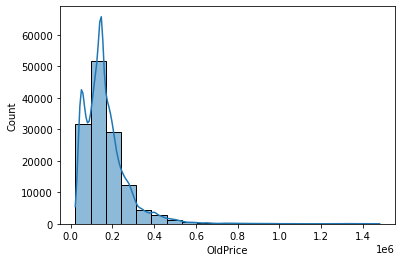

In [23]:
sns.histplot(uk_hpi ['OldPrice'], bins=20, kde = True) # shows extreme values for 'OldPrice'

<AxesSubplot:xlabel='Index', ylabel='Count'>

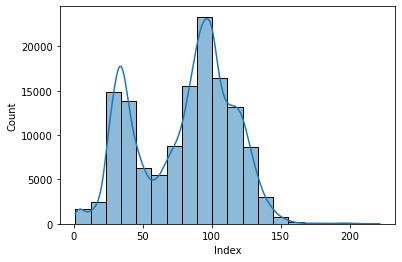

In [24]:
sns.histplot(uk_hpi ['Index'], bins=20, kde = True) # shows extreme values for 'Index'

<AxesSubplot:xlabel='%Change_AvgPrice_12months', ylabel='Count'>

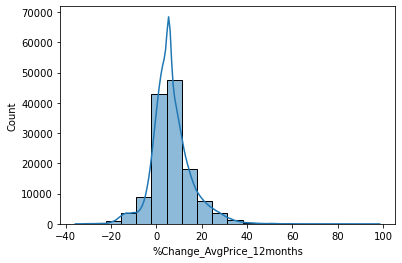

In [35]:
sns.histplot(uk_hpi ['%Change_AvgPrice_12months'], bins=20, kde = True) # shows extreme values for '%Change_AvgPrice_12months

In [32]:
# To check the descriptive statistics

uk_hpi.describe()

,AveragePrice,Index,%Change_AvgPrice_1month,%Change_AvgPrice_12months,NewPrice,NewSalesVolume,OldPrice,OldSalesVolume
count,1.348290e+05,134829.000000,134829.000000,134829.000000,1.348290e+05,134829.000000,1.348290e+05,134829.000000
mean,1.659640e+05,80.321920,0.575324,6.538598,1.974968e+05,122.653643,1.664051e+05,1056.745211
std,1.116970e+05,34.467742,2.000222,8.813118,1.132863e+05,795.571678,1.079824e+05,6684.195759
min,2.712016e+03,1.096815,-30.297781,-35.786566,2.722990e+04,0.000000,2.278638e+04,2.000000
25%,9.309390e+04,46.254770,-0.429154,1.619492,1.249587e+05,10.000000,9.973920e+04,128.000000
50%,1.459236e+05,88.442346,0.530798,5.535979,1.822456e+05,20.000000,1.466919e+05,192.000000
75%,2.081496e+05,105.411653,1.521648,10.537074,2.425342e+05,42.000000,2.037794e+05,324.000000
max,1.463378e+06,221.485238,35.286646,98.437940,1.324994e+06,21097.000000,1.479584e+06,148132.000000


All of the statistics values make sense apart from the max in both sales volumes. It is difficult to sale 21097 or 148132 houses in one month in one area, specially seeing where the 75th percentil falls. However I cannot be sure since we have data for the whole of the regions, so lets check how many of those figures are in the data.

In [33]:
# To check how many extreme values

uk_hpi[uk_hpi['NewSalesVolume'] > 20000]

,RegionName,AreaCode,AveragePrice,Index,%Change_AvgPrice_1month,%Change_AvgPrice_12months,NewPrice,NewSalesVolume,OldPrice,OldSalesVolume
47492,Great Britain,K03000001,169122.5010,87.629278,0.981360,6.877731,208849.2741,20398.0,166280.9209,122249.0
119315,United Kingdom,K02000001,168184.1320,88.209262,0.947365,7.282829,205571.5404,21097.0,165384.6360,125156.0
119321,United Kingdom,K02000001,176819.0361,92.738099,1.245176,10.367749,214433.6002,20413.0,174039.1626,121587.0


In [34]:
uk_hpi[uk_hpi['OldSalesVolume'] > 20000]

,RegionName,AreaCode,AveragePrice,Index,%Change_AvgPrice_1month,%Change_AvgPrice_12months,NewPrice,NewSalesVolume,OldPrice,OldSalesVolume
40671,England,E92000001,53202.77128,26.226925,0.530798,1.387601,64657.42486,5308.0,52440.59891,42331.0
40672,England,E92000001,53096.15490,26.174367,-0.200396,1.184424,65024.06107,6295.0,52272.48177,41585.0
40673,England,E92000001,53201.28430,26.226192,0.197998,1.384768,65320.41508,9447.0,52354.81645,57578.0
40674,England,E92000001,53590.85480,26.418235,0.732258,1.027949,64888.98479,7545.0,52853.81860,49380.0
40675,England,E92000001,53678.24041,26.461313,0.163061,1.192686,65259.63874,8885.0,52906.14731,55307.0
...,...,...,...,...,...,...,...,...,...,...
119491,United Kingdom,K02000001,249970.89980,131.104805,0.033104,8.395985,309819.19610,4501.0,246079.87630,88163.0
119492,United Kingdom,K02000001,254061.62890,133.250312,1.636482,9.187499,320430.93340,6494.0,249568.90950,122910.0
119493,United Kingdom,K02000001,251636.01760,131.978126,-0.954733,9.256021,335013.75610,2990.0,245540.72690,77195.0
119494,United Kingdom,K02000001,253297.97830,132.849792,0.660462,9.412330,324731.85660,2594.0,248317.00680,68274.0


Seeing this max values, it seems very possible that they are right. They are details for the whole country, and there could have been months were the sales were that big in those areas. For that reason, I won't delete any rows.

### 5. Choropleth map

In [36]:
# Create a data frame with just the variables we want plotted

data_to_plot = uk_hpi[['AreaCode','NewSalesVolume']]
data_to_plot.head()

,AreaCode,NewSalesVolume
0,S12000034,103.0
1,S12000034,107.0
2,S12000034,140.0
3,S12000034,180.0
4,S12000034,167.0


In [62]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = uk_geo, 
    data = data_to_plot,
    columns = ['AreaCode', 'NewSalesVolume'],
    key_on = 'object.lad.geometry.id', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

AttributeError: 'NoneType' object has no attribute 'get'

In [57]:
# Create a data frame with just the variables we want plotted

data_to_plot2 = uk_hpi[['RegionName','NewSalesVolume']]
data_to_plot2.head()

,RegionName,NewSalesVolume
0,Aberdeenshire,103.0
1,Aberdeenshire,107.0
2,Aberdeenshire,140.0
3,Aberdeenshire,180.0
4,Aberdeenshire,167.0


In [64]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = uk_geo, 
    data = data_to_plot2,
    columns = ['RegionName', 'NewSalesVolume'],
    key_on = 'object.properties.LAD13NM', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

AttributeError: 'NoneType' object has no attribute 'get'

### 6. Conclussions